In [3]:
import pandas as pd
import os

In [4]:
dataframes = []
for csv_file in filter(lambda x:x.endswith(".csv"), os.listdir(".")):
    df = pd.read_csv(csv_file, names= ["Dataset", "Top K", "QTS", "ndcg@10","ndcg@1000","recall@1000","Score QTS", "GPU to CPU"])
    df.insert(0, "System", csv_file[:-4], True)
    #print(len(df.columns))
    #if len(df.columns) == 3:
    #    df.names = ["Dataset", "Top K", "QTS"]
    #else:
    #    df.names = ["Dataset", "Top K", "QTS", "Score QTS", "Mem transference"]
    dataframes.append(df)

data = pd.concat(dataframes, axis=0, ignore_index=True)

In [4]:
data.to_csv("merged_results.csv" , index=False)

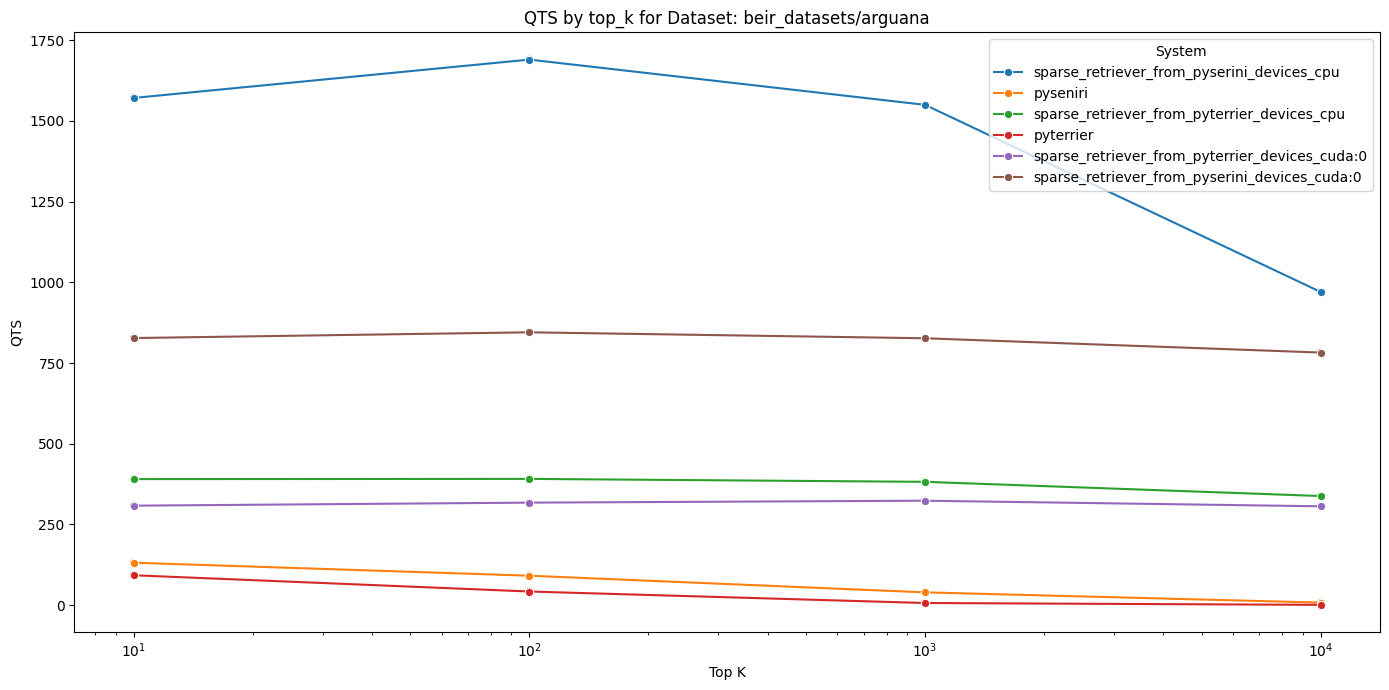

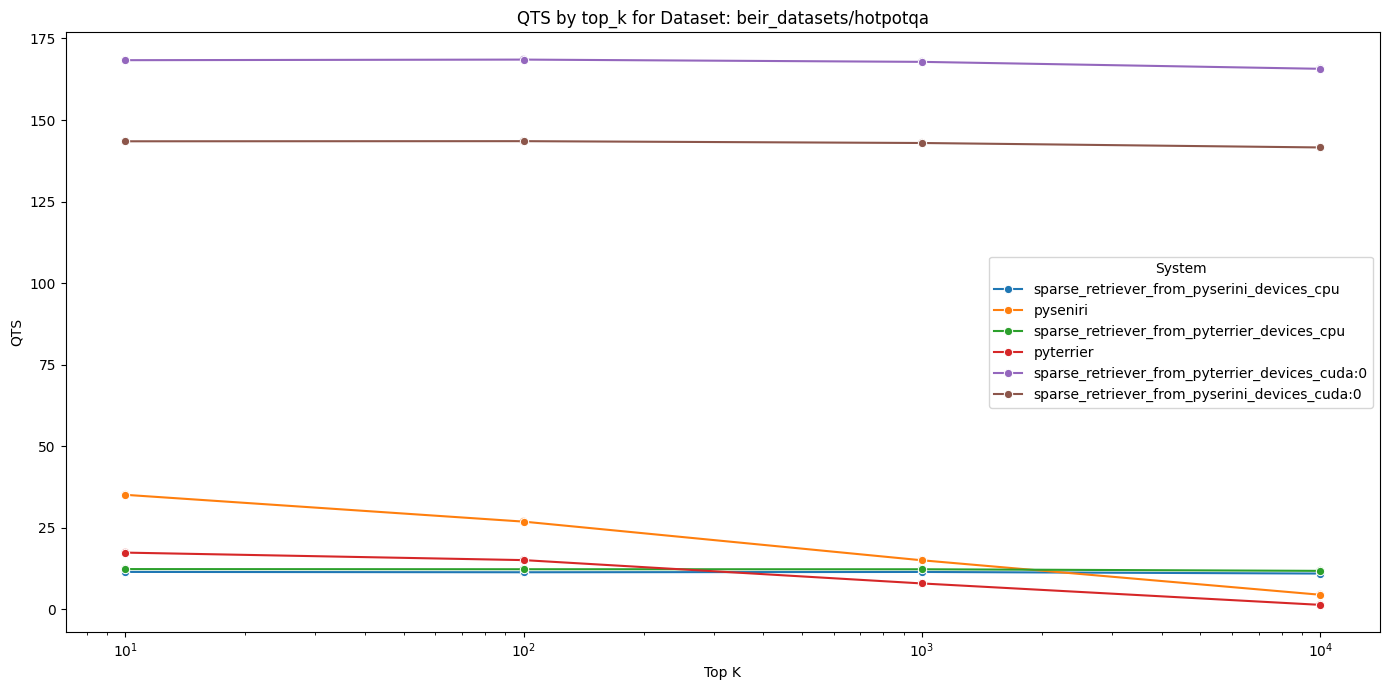

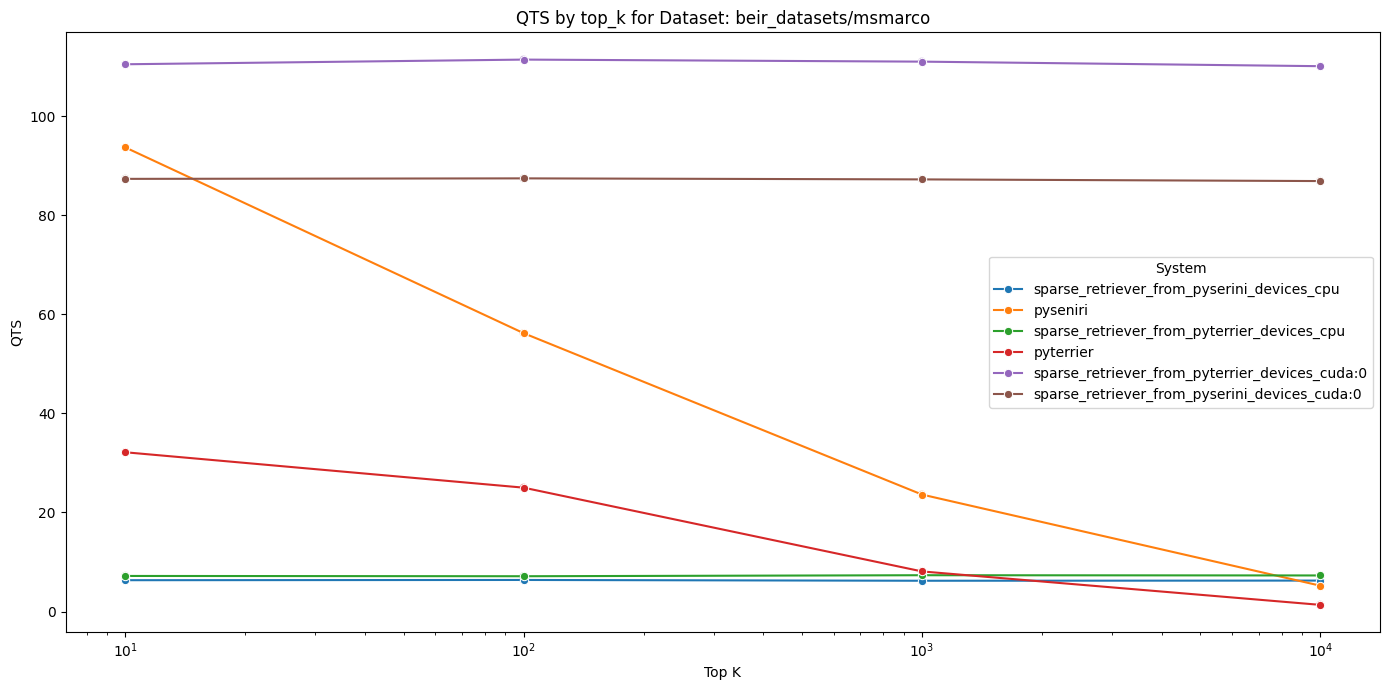

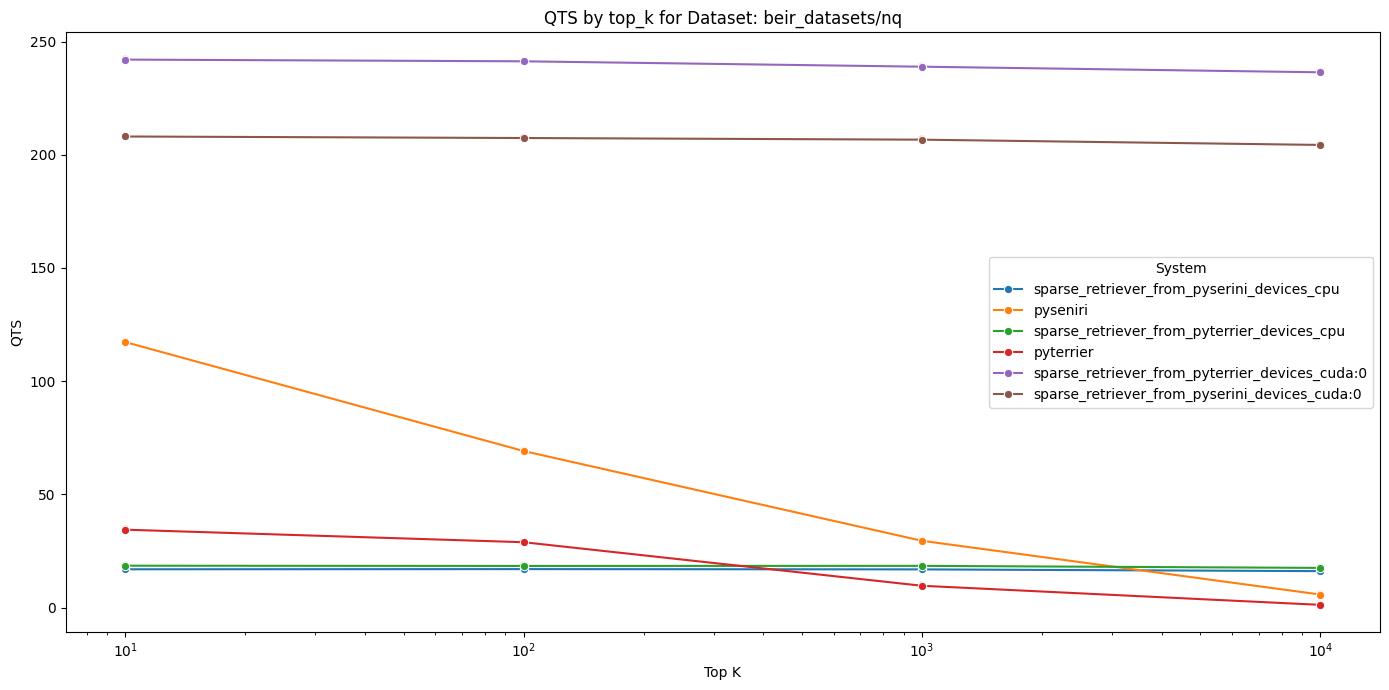

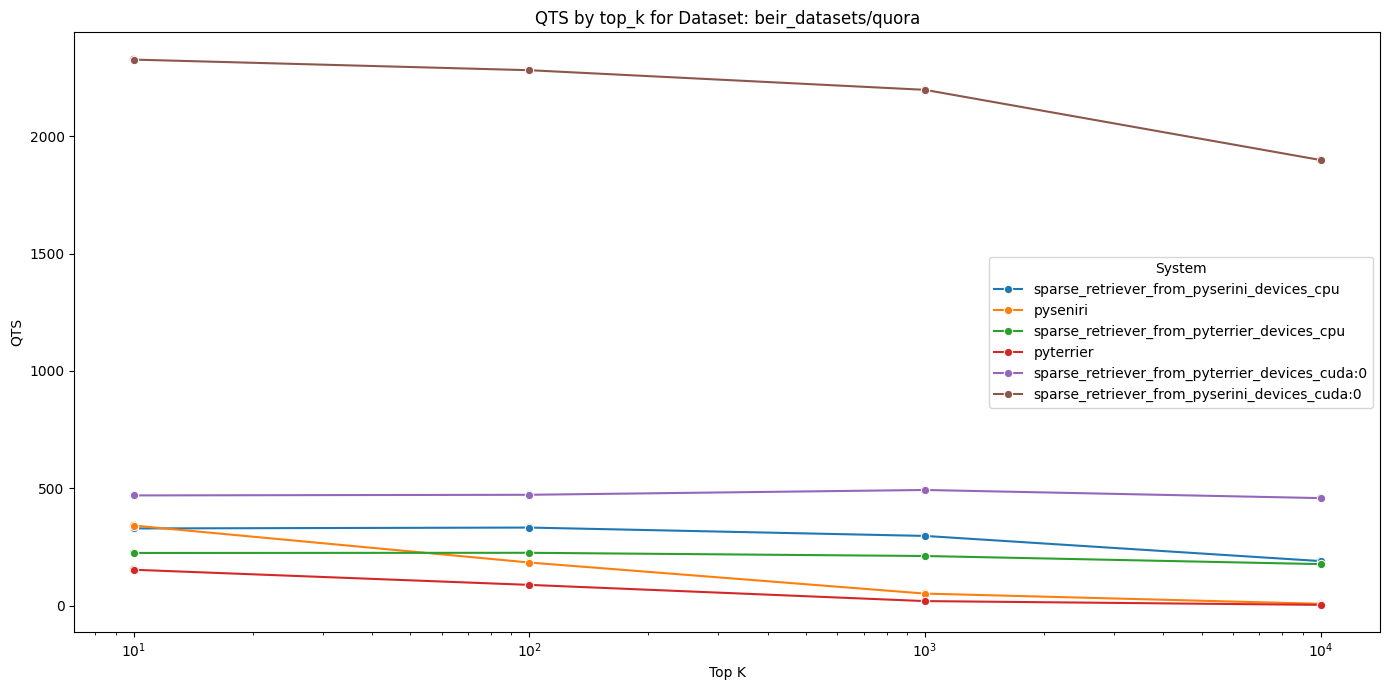

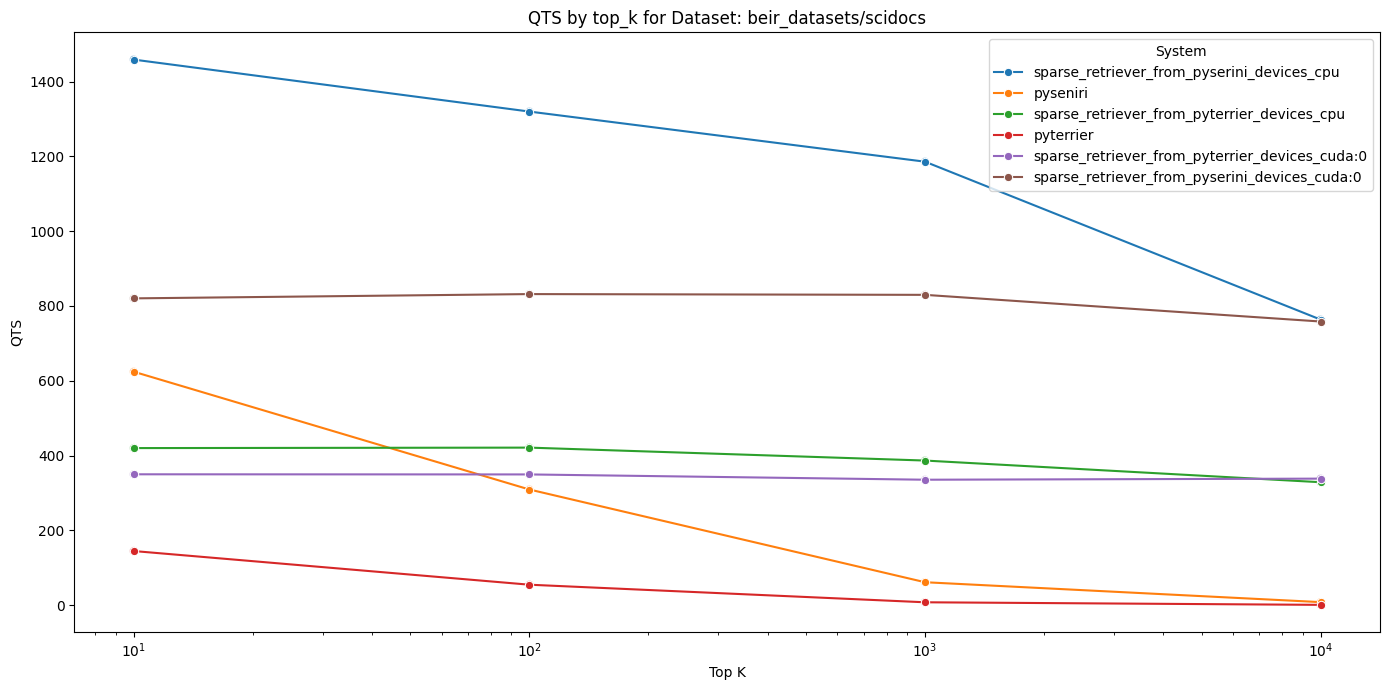

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# pivot_data = data.pivot_table(values='QTS', index='System', columns='Top K')
datasets = data['Dataset'].unique()

systems_to_keep = ['pyseniri', #pyserini
                   'pyterrier', 
                   "sparse_retriever_from_pyserini_devices_cpu", 
                   "sparse_retriever_from_pyterrier_devices_cpu",
                   "sparse_retriever_from_pyserini_devices_cuda:0", 
                   "sparse_retriever_from_pyterrier_devices_cuda:0",]
data = data[data['System'].isin(systems_to_keep)]


# Plot for each dataset
for dataset in datasets:
    plt.figure(figsize=(14, 7))
    
    # Filter the data for the specific dataset
    subset_data = data[data['Dataset'] == dataset]
    
    sns.lineplot(x='Top K', y='QTS', hue='System', data=subset_data, marker='o', dashes=False, markersize=6)
    sns.scatterplot(x='Top K', y='QTS', hue='System', data=subset_data, legend=False)
    plt.xscale('log')
    plt.title(f'QTS by top_k for Dataset: {dataset}')
    plt.legend(title='System')
    plt.tight_layout()
    plt.show()


In [8]:
grouped = data.groupby(['System', 'Top K', 'Dataset'])#['QTS'].mean().reset_index()
grouped

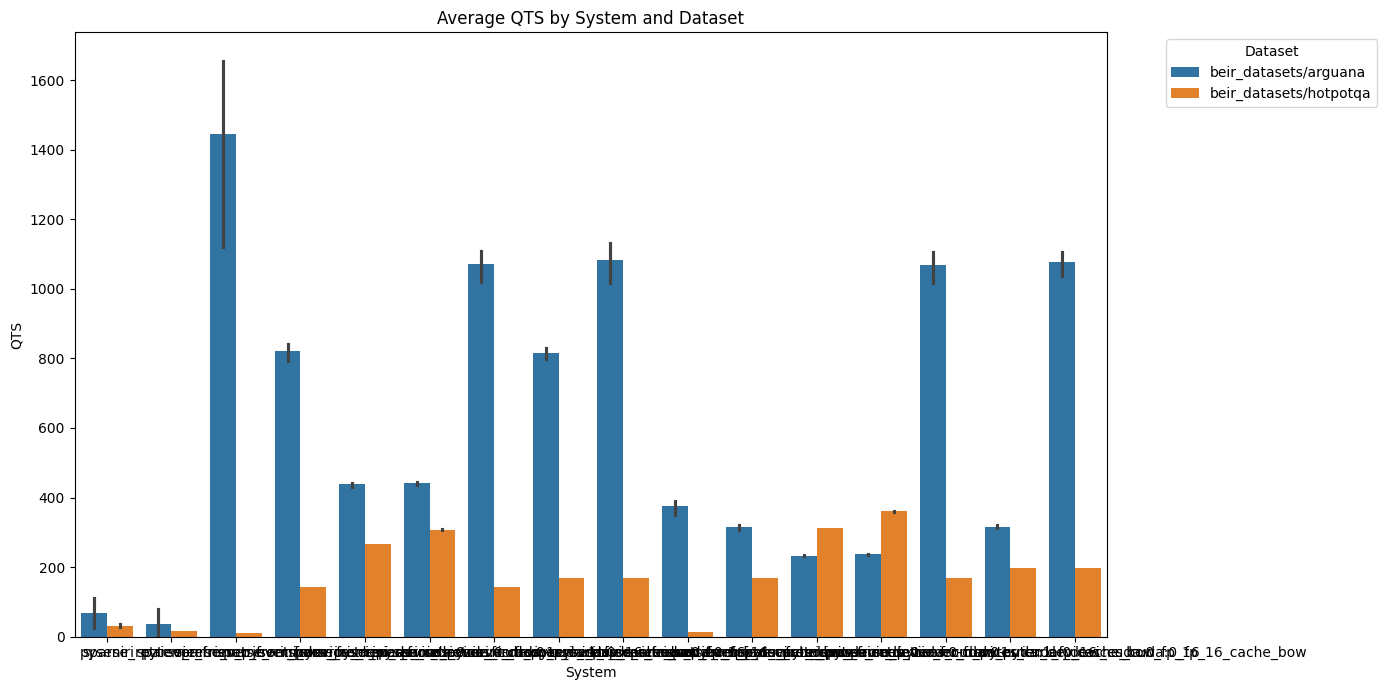

In [52]:
plt.figure(figsize=(14, 7))
sns.barplot(x='System', y='QTS', hue='Dataset', data=grouped)
plt.title('Average QTS by System and Dataset')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()